# TIME SERIES ANALYSIS USING PROPHET
COVID19 Case Predictions with Prophet Model


---




This project aims to analyze COVID-19 data using the Prophet time series model to identify trends and predict future confirmed cases. By preprocessing the dataset and leveraging Prophet’s capabilities, key patterns like trends and seasonality are explored. The ultimate goal is to evaluate the model’s performance and understand its predictive power through metrics and residual analysis.

**Data Source:** The dataset used for this analysis was downloaded from Kaggle and contains daily COVID-19 statistics. https://www.kaggle.com/datasets/shriyasingh900/covid19-dataset

In [2]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load Data
data = pd.read_csv('covid_19_clean_complete.csv')
data.head(3)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa


#### DATA PREPROCESSING

The dataset was preprocessed by inspecting data types and dimensions, converting the 'Date' column to datetime format, and verifying unique dates. Data was grouped by 'Date' to calculate daily totals. The 'Date' and 'Confirmed' columns were renamed to 'ds' and 'y' for Prophet compatibility, and non-essential columns were removed to focus on confirmed cases.

In [4]:
# Data Types
data.dtypes

,0
Province/State,object
Country/Region,object
Lat,float64
Long,float64
Date,object
Confirmed,int64
Deaths,int64
Recovered,int64
Active,int64
WHO Region,object


In [5]:
# Total Columns and Rows
data.shape

(49068, 10)

In [6]:
# Covert Date Format
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
# Check Null Values
data.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [8]:
# Unique Dates
data['Date'].nunique()

188

In [9]:
# Group Data by Dates
data2 = data.groupby(['Date'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
data2['Date'].head(3)

,Date
0,2020-01-22
1,2020-01-23
2,2020-01-24


In [10]:
data2.shape

(188, 5)

In [11]:
# Rename Columns as ds and y
df = data2.rename(columns={'Date': 'ds', 'Confirmed': 'y'})
# Drop Deaths, Recovered and Active Column
df.drop(['Deaths', 'Recovered', 'Active'], axis=1, inplace=True)
df.head(3)

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941


#### PLOT THE DATA

Text(0, 0.5, 'Cases')

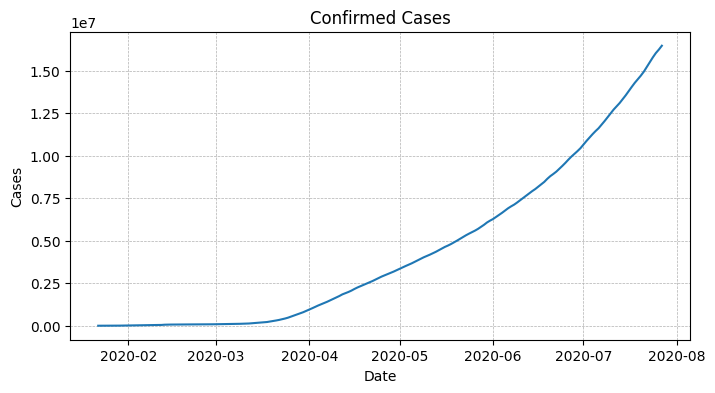

In [12]:
plt.figure(figsize=(8,4))
plt.plot(df['ds'], df['y'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Confirmed Cases', fontsize=12)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Cases', fontsize=10)



> The plot shows the trend of confirmed COVID-19 cases over time, demonstrating a clear exponential growth pattern during the observed period.



#### BUILDING THE PROPHET MODEL

**Fitting the Model:** The Prophet model is initialized and fitted to the training dataset to capture trends and seasonality patterns.

In [13]:
# Fit the Prophet Model
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, add_changepoints_to_plot

m = Prophet()
model=m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvqzboayp/oio2tfk7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvqzboayp/qnhdk609.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1926', 'data', 'file=/tmp/tmpvqzboayp/oio2tfk7.json', 'init=/tmp/tmpvqzboayp/qnhdk609.json', 'output', 'file=/tmp/tmpvqzboayp/prophet_modelru3r5zv3/prophet_model-20241219145049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:50:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:50:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Making Predictions:** A future dataframe is created for the next 30 days, and the model predicts the confirmed cases for this period.

In [14]:
# Create Future Dataframe
future = model.make_future_dataframe(periods=30, freq='D', include_history=False)
forecast = model.predict(future)

# View Predictions
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-07-28,1.632020e+07,1.621924e+07,1.643263e+07
1,2020-07-29,1.652997e+07,1.642275e+07,1.663320e+07
2,2020-07-30,1.674391e+07,1.663175e+07,1.685091e+07
3,2020-07-31,1.695910e+07,1.684709e+07,1.706350e+07
4,2020-08-01,1.716676e+07,1.704431e+07,1.727728e+07
5,2020-08-02,1.736430e+07,1.725063e+07,1.747884e+07
6,2020-08-03,1.755889e+07,1.744249e+07,1.767739e+07
7,2020-08-04,1.774813e+07,1.761850e+07,1.786679e+07
8,2020-08-05,1.795791e+07,1.783429e+07,1.808361e+07
9,2020-08-06,1.817184e+07,1.803585e+07,1.830421e+07


In [15]:
forecast.shape

(30, 16)

#### FORECAST VISUALIZATION

The plot below illustrates the observed data alongside the forecasted confirmed cases. It also highlights the uncertainty intervals, providing insights into potential variations in future trends.

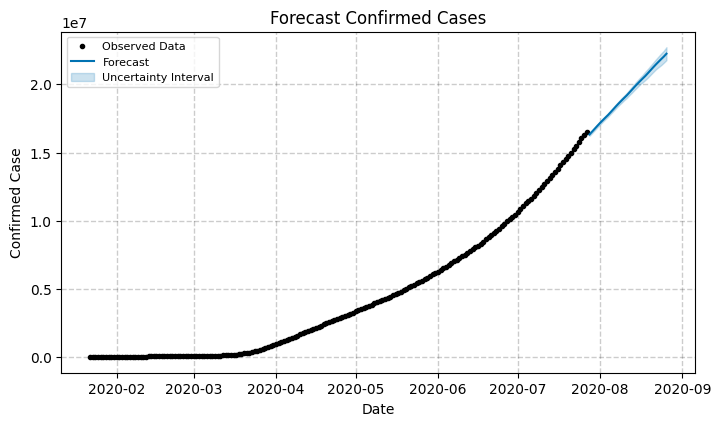

In [16]:
# Generate the Prophet plot
fig = model.plot(forecast)

ax = fig.gca()
fig.set_size_inches(7, 4)

ax.grid(True, linestyle='--', color='black')
ax.set_title('Forecast Confirmed Cases', fontsize=12)
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('Confirmed Case', fontsize=10)
ax.legend(['Observed Data', 'Forecast', 'Uncertainty Interval'], loc='upper left', fontsize=8)
plt.show()

Component analysis plot below provides insights into the components influencing the forecast.

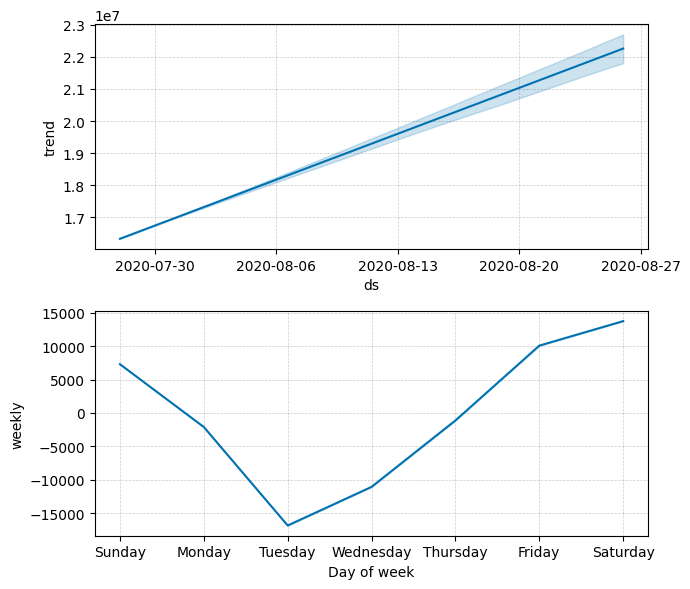

In [17]:
# Generate the Prophet components plot
fig = model.plot_components(forecast)

axes = fig.get_axes()
fig.set_size_inches(7, 6)

for ax in axes:
    ax.grid(True, linestyle='--', linewidth=0.5, color='black')
    ax.title.set_fontsize(12)
    ax.xaxis.label.set_fontsize(10)
    ax.yaxis.label.set_fontsize(10)

fig.tight_layout()
plt.show()

**Trend**: The upper panel shows a steady exponential increase in confirmed cases over time, reflecting the overall growth pattern of the pandemic.

**Weekly Seasonality**: The lower panel highlights weekly fluctuations, indicating that cases tend to drop on Mondays and steadily rise toward the weekend.

#### CROSS VALIDATING THE MODEL

To evaluate the model’s performance, cross-validation was performed using Prophet’s diagnostic tools. The dataset was divided into training and testing splits dynamically by the cross_validation function. A rolling origin approach was used to forecast for a horizon of 30 days with a training period of at least 150 days, and evaluations were conducted at intervals of 30 days.

In [18]:
from prophet.diagnostics import cross_validation
cv = cross_validation(model, horizon='30 days', period='30 days', initial='150 days')
cv.sample(5)

INFO:prophet:Making 1 forecasts with cutoffs between 2020-06-27 00:00:00 and 2020-06-27 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvqzboayp/1usc6b9z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvqzboayp/6_murwcb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44771', 'data', 'file=/tmp/tmpvqzboayp/1usc6b9z.json', 'init=/tmp/tmpvqzboayp/6_murwcb.json', 'output', 'file=/tmp/tmpvqzboayp/prophet_modelmrk77qx0/prophet_model-20241219145103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:51:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:51:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
20,2020-07-18,1.250476e+07,1.232679e+07,1.270887e+07,14292198,2020-06-27
11,2020-07-09,1.130617e+07,1.121923e+07,1.139831e+07,12273063,2020-06-27
27,2020-07-25,1.342757e+07,1.315339e+07,1.374951e+07,16047190,2020-06-27
13,2020-07-11,1.158194e+07,1.148947e+07,1.169130e+07,12721968,2020-06-27
5,2020-07-03,1.052282e+07,1.046247e+07,1.058011e+07,11078585,2020-06-27


In [19]:
cv.shape

(30, 6)

In [20]:
from prophet.diagnostics import performance_metrics
performance = performance_metrics(cv)
performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,8.991621e+10,2.998603e+05,2.982883e+05,0.028980,0.028752,0.029409,0.0
1,4 days,1.262131e+11,3.552648e+05,3.513753e+05,0.033511,0.032267,0.034092,0.0
2,5 days,1.777171e+11,4.215651e+05,4.168035e+05,0.038999,0.039512,0.039789,0.0
3,6 days,2.427774e+11,4.927245e+05,4.896636e+05,0.044965,0.045217,0.046009,0.0
4,7 days,3.088267e+11,5.557218e+05,5.535089e+05,0.049922,0.050166,0.051208,0.0
5,8 days,3.810181e+11,6.172666e+05,6.152759e+05,0.054552,0.054384,0.056088,0.0
6,9 days,4.503916e+11,6.711122e+05,6.696956e+05,0.058452,0.059105,0.060217,0.0
7,10 days,5.372340e+11,7.329625e+05,7.312540e+05,0.062795,0.061866,0.064837,0.0
8,11 days,6.403074e+11,8.001921e+05,7.976176e+05,0.067339,0.067413,0.069697,0.0
9,12 days,7.796007e+11,8.829500e+05,8.802395e+05,0.072978,0.072739,0.075754,0.0


The average performance metrics from cross-validation are as follows.

In [21]:
# Average Performance Metrics
print("MSE:", performance['mse'].mean().round(3))
print("RMSE:", performance['rmse'].mean().round(3))
print("MAE:", performance['mae'].mean().round(3))
print("MAPE:", performance['mape'].mean().round(3))

MSE: 2339143902993.477
RMSE: 1347913.031
MAE: 1345658.575
MAPE: 0.097




> MSE: Extremely high due to the large scale of the data, making it less interpretable.  
RMSE: Approximately 1,347,913 cases, indicating significant prediction errors in absolute terms.  
MAE: Around 1,345,659 cases, reflecting the typical size of errors.  
MAPE: 9.7%, showing that predictions deviate on average by 9.7% of actual values, which demonstrates strong relative accuracy.



Overall, while the absolute errors (RMSE and MAE) highlight challenges in predicting large values accurately, the MAPE demonstrates that the model performs well in capturing relative trends and variations in the data. This suggests the model is suitable for trend forecasting but could benefit from further optimization for more precise case predictions.

#### RESIDUAL ANALYSIS
The residual plot shows the differences between the actual values and the predicted values over time.

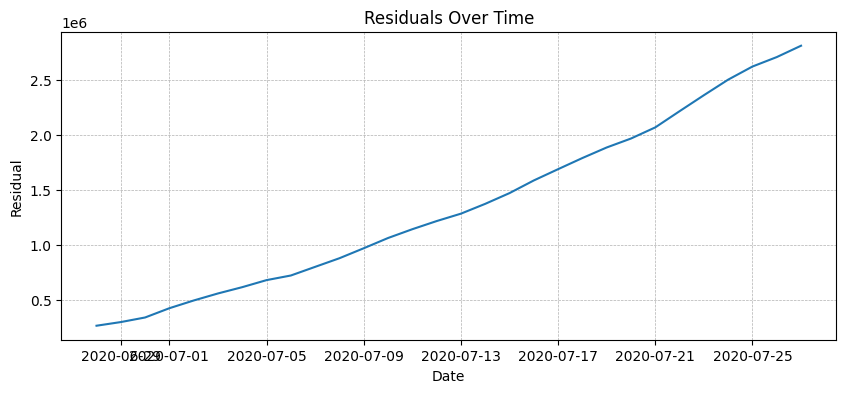

In [22]:
cv['residual'] = cv['y'] - cv['yhat']

plt.figure(figsize=(10,4))
plt.plot(cv['ds'], cv['residual'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title("Residuals Over Time")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.show()



> The residual plot shows a steady increase in errors over time, indicating that the model tends to underestimate the actual values as the dataset progresses. This upward trend suggests that the model struggles to fully capture the exponential growth in cases. The residuals reach up to 2.5 million, aligning with the high RMSE observed in performance metrics. This highlights the need for further tuning or incorporating additional factors to improve the model's accuracy.

